<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Introduction to Boosting with an example: Adaptive Boosting algorithm (AdaBoost)

_Instructor: Aymeric Flaisler_

---

### Learning Objectives
- Understand the differences between bagging and boosting.
- Understand how boosting is an ensemble method.
- Learn the pros and cons to using boosting models.
- Learn the math and procedure for AdaBoost, the "classic" boosting model.
- Understand the differences between AdaBoost and Gradient Boosting Models.


### Lesson Guide
- [Boosting as an ensemble method](#intro)
- [Pros and cons to boosting](#pros-cons)
- [A visual description of bagging vs. boosting](#viz)
- [Boosting and the bias-variance tradeoff](#bias-variance)
- [AdaBoost](#adaboost)
    - [Training example weights](#ex-weights)
- [AdaBoost visualization](#adaboost-viz)    
- [Gradient boosting models](#gradient)
- [Gradient boosting visualization](#gboost-viz)
- [The difference between the adaboost and gradient boosting](#the-difference-between-the-adaboost-and-gradient-boosting)
- [Additional resources](#resources)

<a id='intro'></a>

## Boosting as an ensemble method

---

Boosting is another ensemble method with a different approach to bagging. Boosting takes a weak base learner and tries to make it a strong learner by re-training it on the misclassified samples.

1. **Base model fitting is an iterative procedure**: it cannot be run in parallel.
- **Weights assigned to observations indicating their "importance"**: samples with higher weights are given higher influence on the total error of the next model, prioritizing those observations.
- **Weights change at each iteration with the goal of correcting the errors/misclassifications of the previous iteration**: the first base estimator is fit with uniform weights on the observations.
- **Final prediction is typically constructed by a weighted vote**: weights for each base model depends on their training errors or misclassification rates.

<a id='pros-cons'></a>
## Pros and cons of boosting

---

### Pros

- Achieves **higher performance than bagging** when hyper-parameters tuned properly.
- Can be used for **classification and regression** equally well.
- Easily handles mixed data types.

---

### Cons

- Difficult and time consuming to **properly tune hyper-parameters**.
- Cannot be **parallelized like bagging** (bad scalability when huge amounts of data).
- **More risk of overfitting** compared to bagging.


<a id='viz'></a>
![boostvsbag](./images/BoostingVSBagging.png) 

<a id='bias-variance'></a>
## Boosting and the bias-variance tradeoff

---

Recall that **bagging aims to reduce variance**.

**Boosting aims to reduce bias!** (and can reduce variance a bit as well).

### Why?

The rationale/theory behind Boosting is to combines **many weak learners into a single strong learner.**

Instead of deep/full decision trees like in bagging, **boosting uses high bias base estimators.**

Thus, each weak learner has:
- Low variance
- High bias

And the iterative fitting to explain error/misclassification unexplained by the previous base models reduces **bias without increasing variance**.

<a id='adaboost'></a>
## AdaBoost

---

AdaBoost is the original boosting algorithm. Predictions from AdaBoost follow the formula:


### $$ AdaBoost(X) = sign\left(\sum_{t=1}^T\alpha_t h_t(X)\right) $$

where

$AdaBoost(X)$ is the classification predictions for $y$ using predictor matrix $X$

$T$ is the set of "weak learners"

$\alpha_t$ is the contribution weight for weak learner $t$

$h_t(X)$ is the prediction of weak learner $t$

and $y$ is binary **with values -1 and 1**

<a id='adaboost-viz'></a>
## AdaBoost visualization

![boostvsbag](./images/adaboost-viz.png)

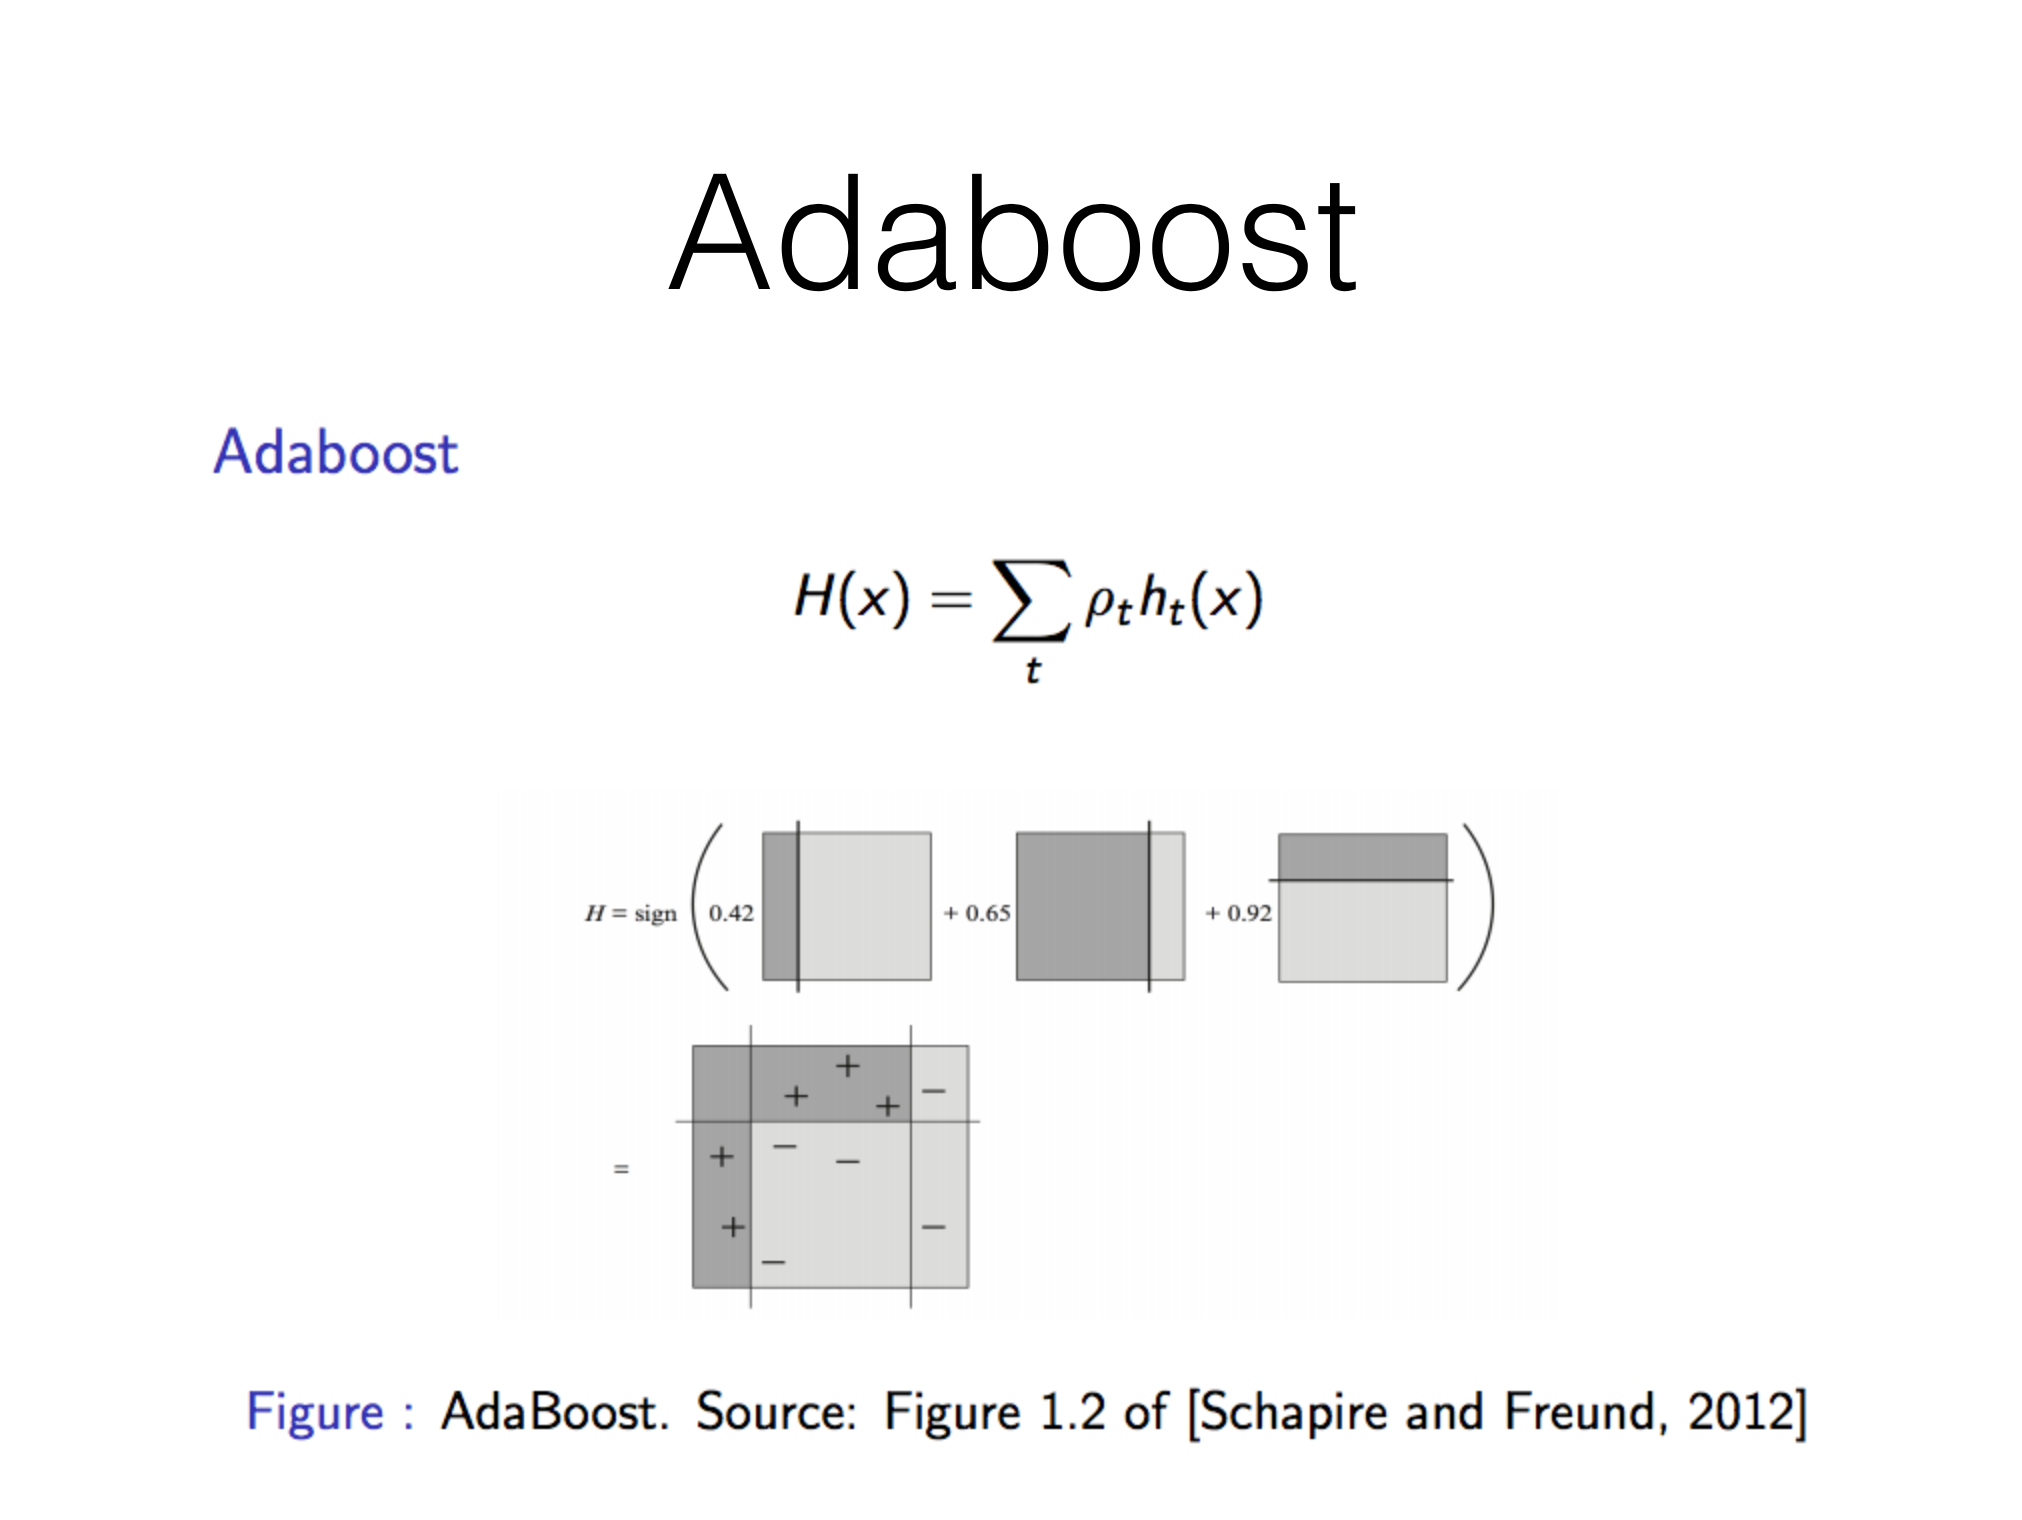

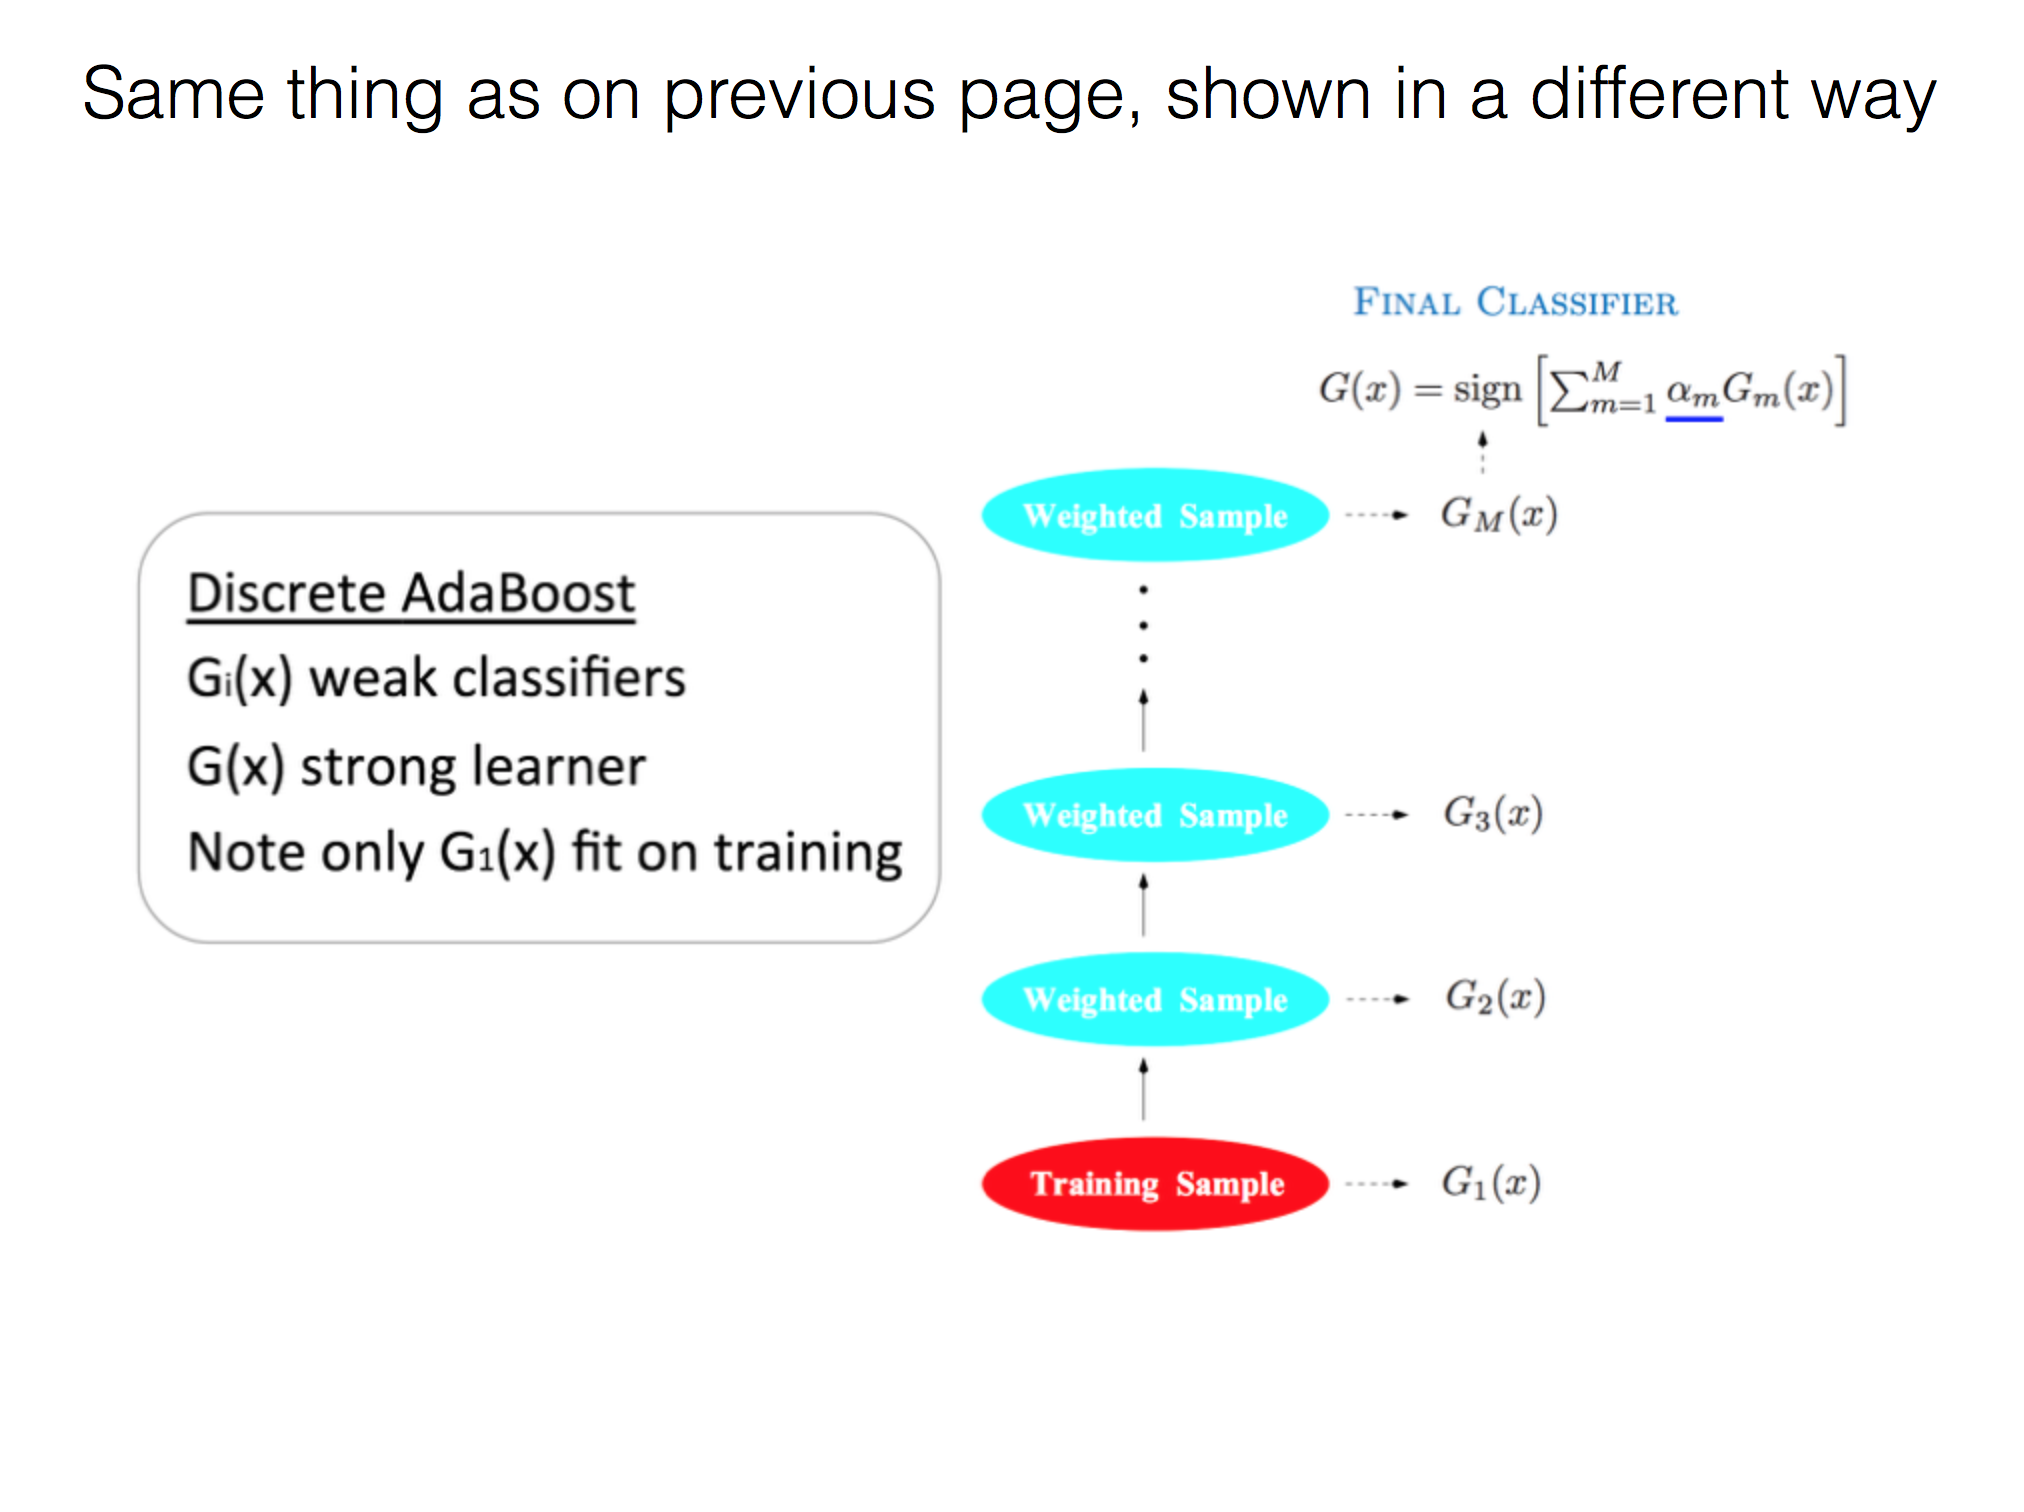

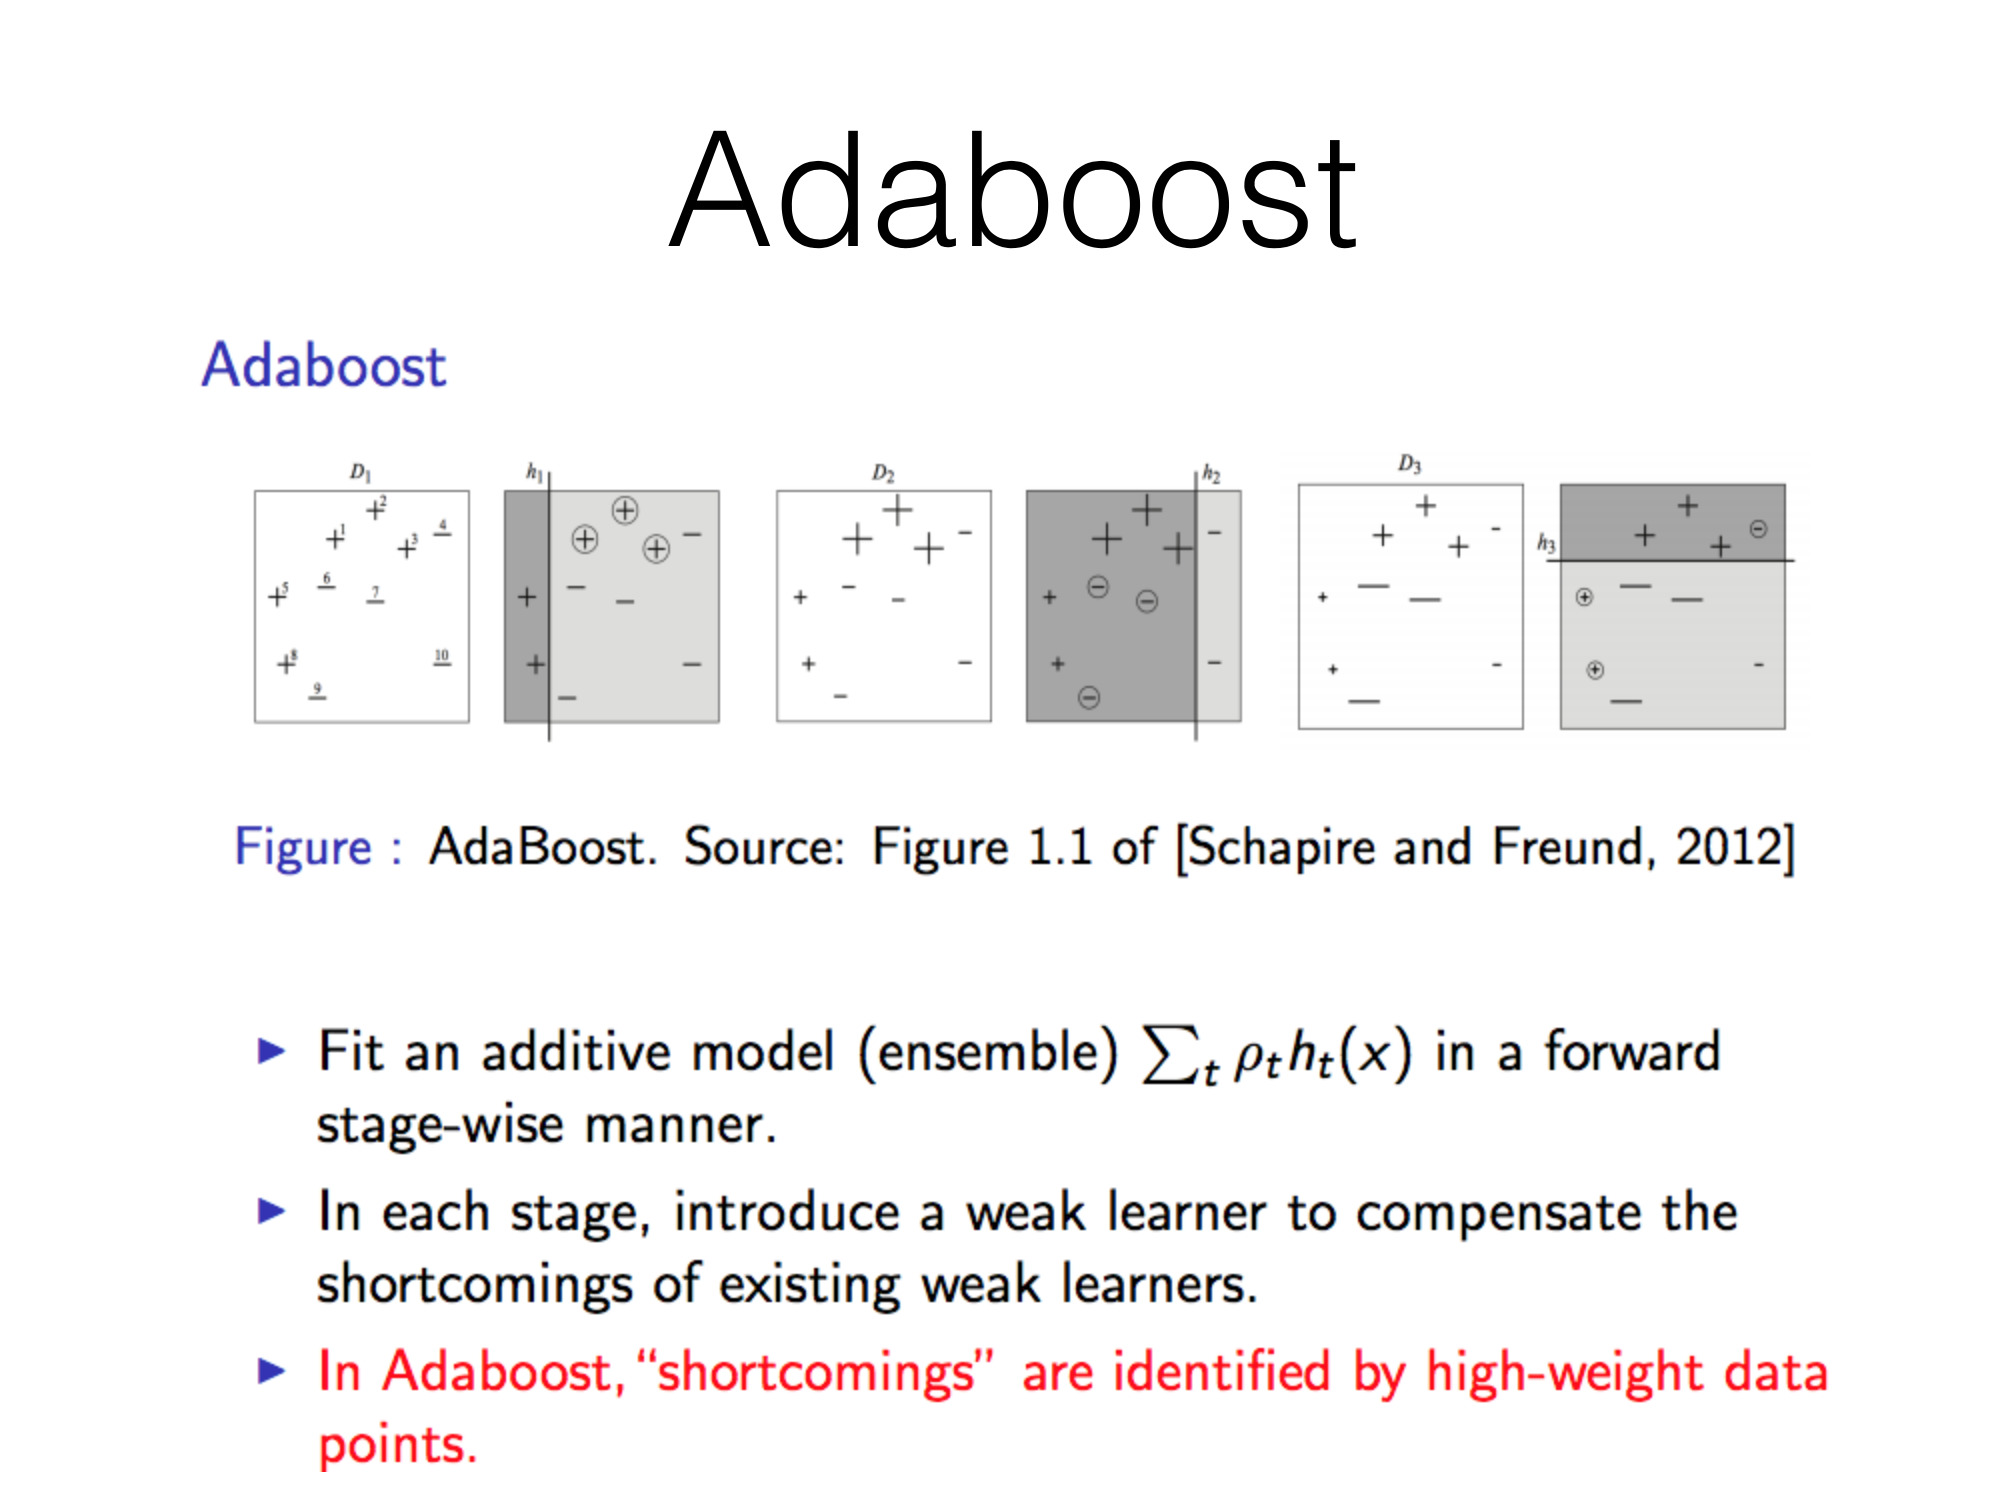


## Discrete AdaBoost Pseudocode

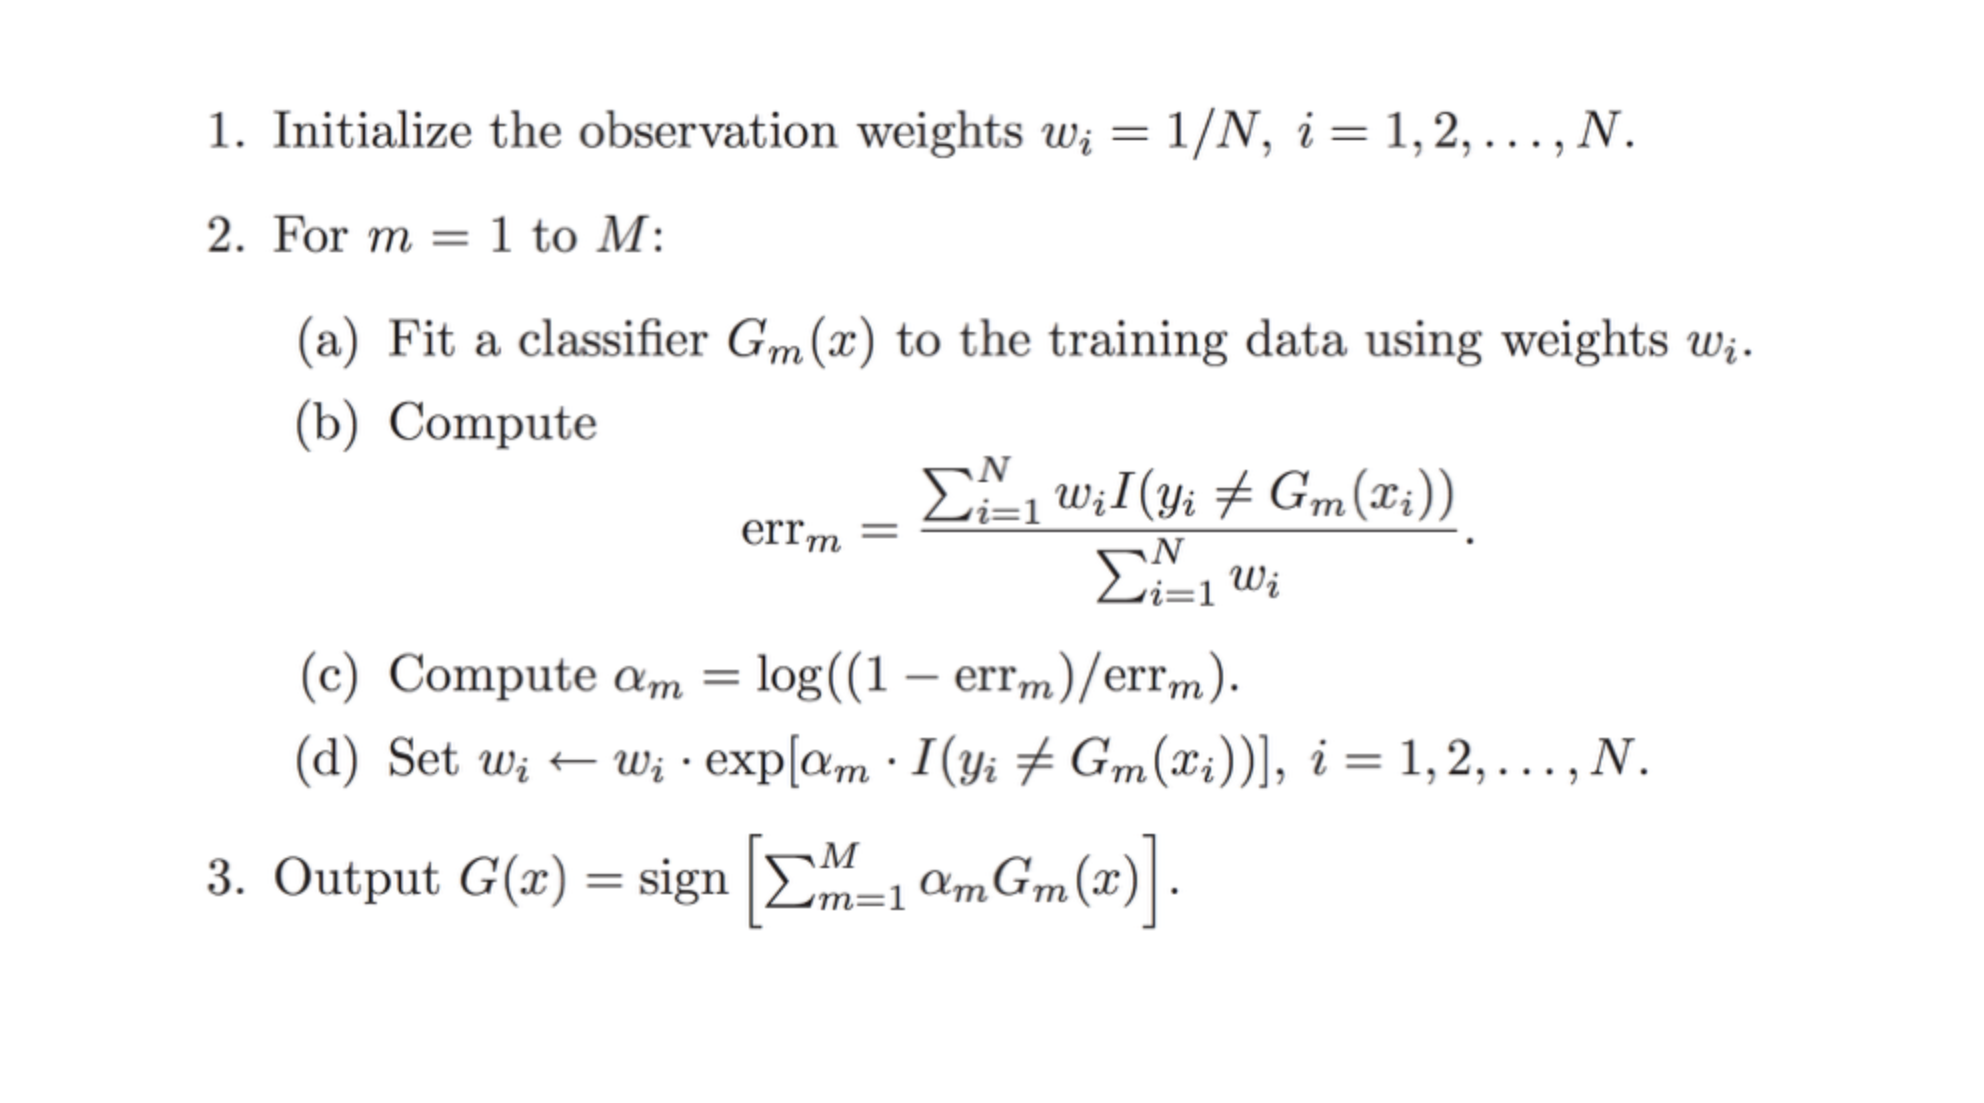


The core principle of AdaBoost is to **fit a sequence of weak learners**, i.e., models that are only slightly better than random guessing, such as decision stump (a single split tree) **on repeatedly modified versions of the data**. After each fit, the importance weights on each observation need to be updated. 

The predictions from all of them are then **combined through a weighted majority vote** (or sum) to produce the final prediction. AdaBoost, like all boosting ensemble methods, focuses the next model's fit on the misclassifications/weaknesses of the prior models.

All training examples start with equal importance weighting. When we finish training a classifier, we update the importance weighting of the classifier itself represented by alpha $\alpha$.

### $$ \alpha_t = \frac{1}{2}ln \left(\frac{1-\epsilon_t}{\epsilon_t}\right) \text{where } \epsilon_t < 1$$

Where $\epsilon_t$ is the misclassification rate for the current classifier:

### $$ \epsilon_t = \frac{\text{misclassifications}_t}{\text{observations}_t} $$

As iterations proceed, **examples that are difficult to predict receive ever-increasing influence**. Each subsequent weak learner is thereby forced to concentrate on the examples that are missed by the previous ones in the sequence.

<a id='ex-weights'></a>
### Training example weights

Adaboost sets up a weight vector on the observations, denoted $D_t$ where $t$ is the current model iteration. $D_t$ is a probability distribution that determines how likely it is a given observation will be selected as part of the training set for the current estimator.

The $\alpha$ weighting of the last fit estimator is used in the equation for the weighting distribution. The update equation is:

### $$ D_{t+1}(i) = D_t(i) e^{-\alpha_t y_i h_t(x_i)} $$

Where $i$ is the vector of observation indices and $x_i$ is the observation at the index. $y_i$ is the target.

$h_t$ is the previous model fit in the boosting chain.

And then divide the weights by a normalisation term, ensuring that they sum to 1 and form a probability distribution:

### $$ D_{t+1}(i) = \frac{D_t(i)} {Z_t}  e^{-\alpha_t y_i h_t(x_i)} $$



<p><strong>Checkout: Review the steps to implement the algorithm and make sure you (and your partner) have understood the underpinnings of boosting.</strong>  </p>

<a id='gradient'></a>
## Gradient boosting regression (intuition)

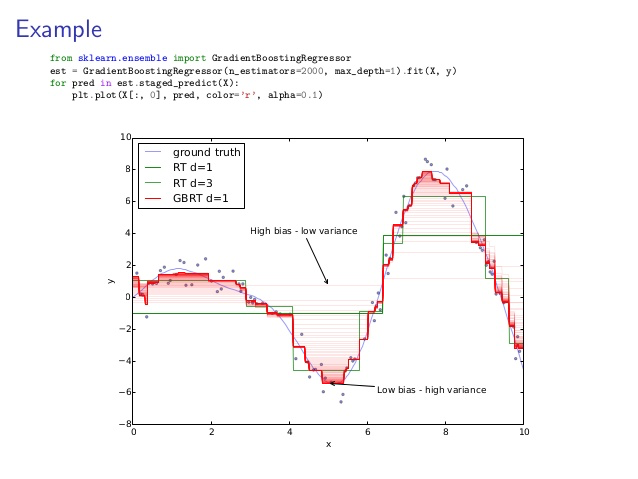

<a id='gradient'></a>
## Gradient boosting regression visualisation

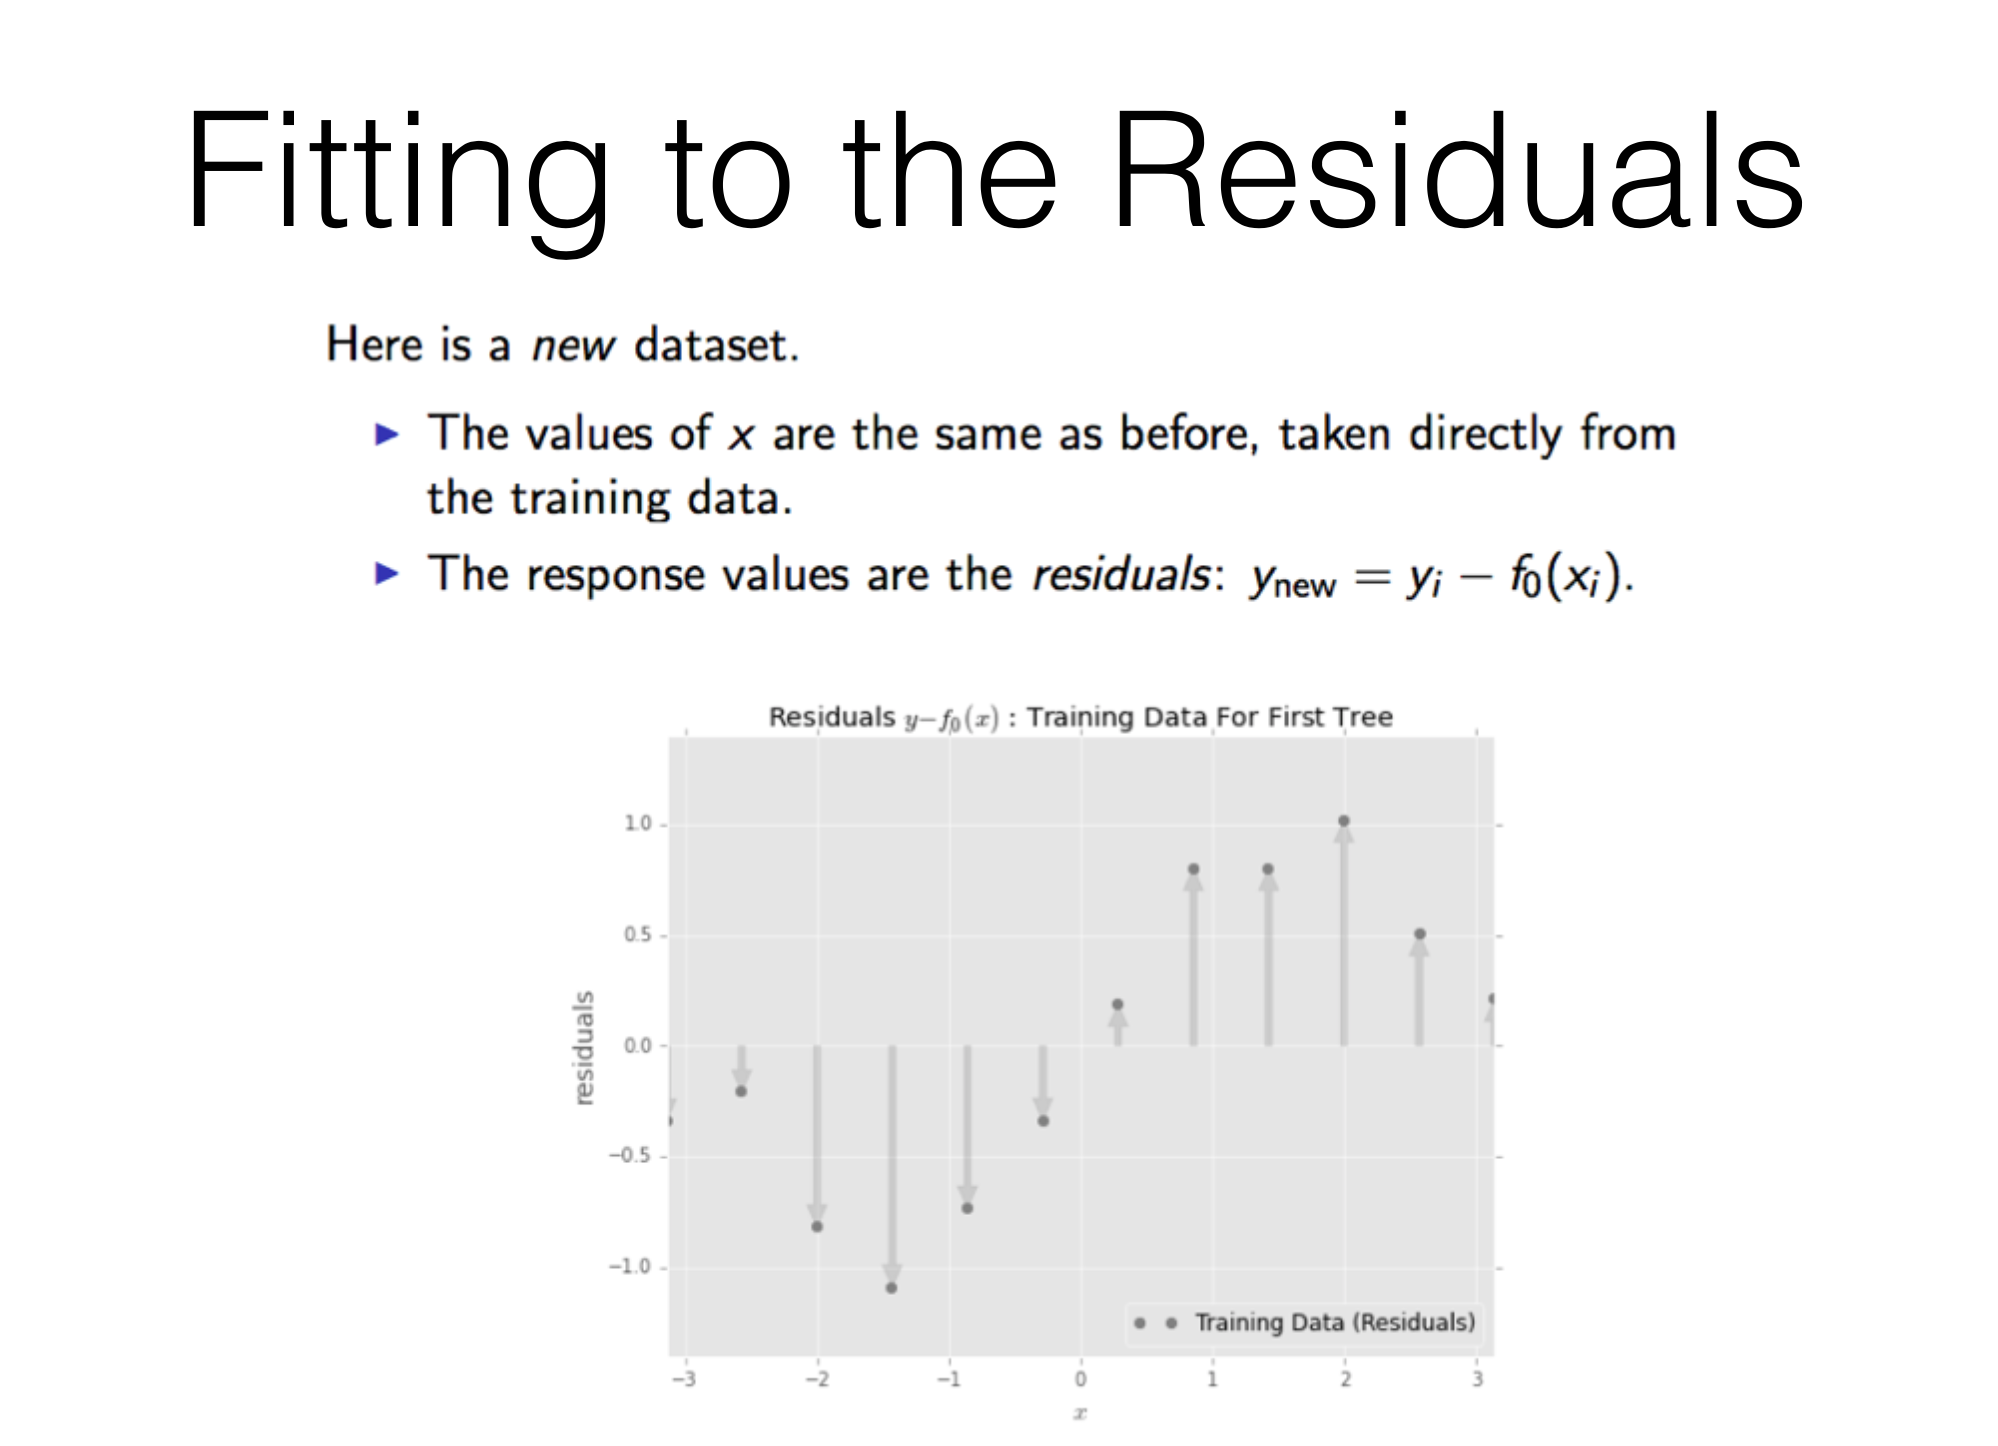

<a id='gradient'></a>
## Gradient boosting regression visualisation

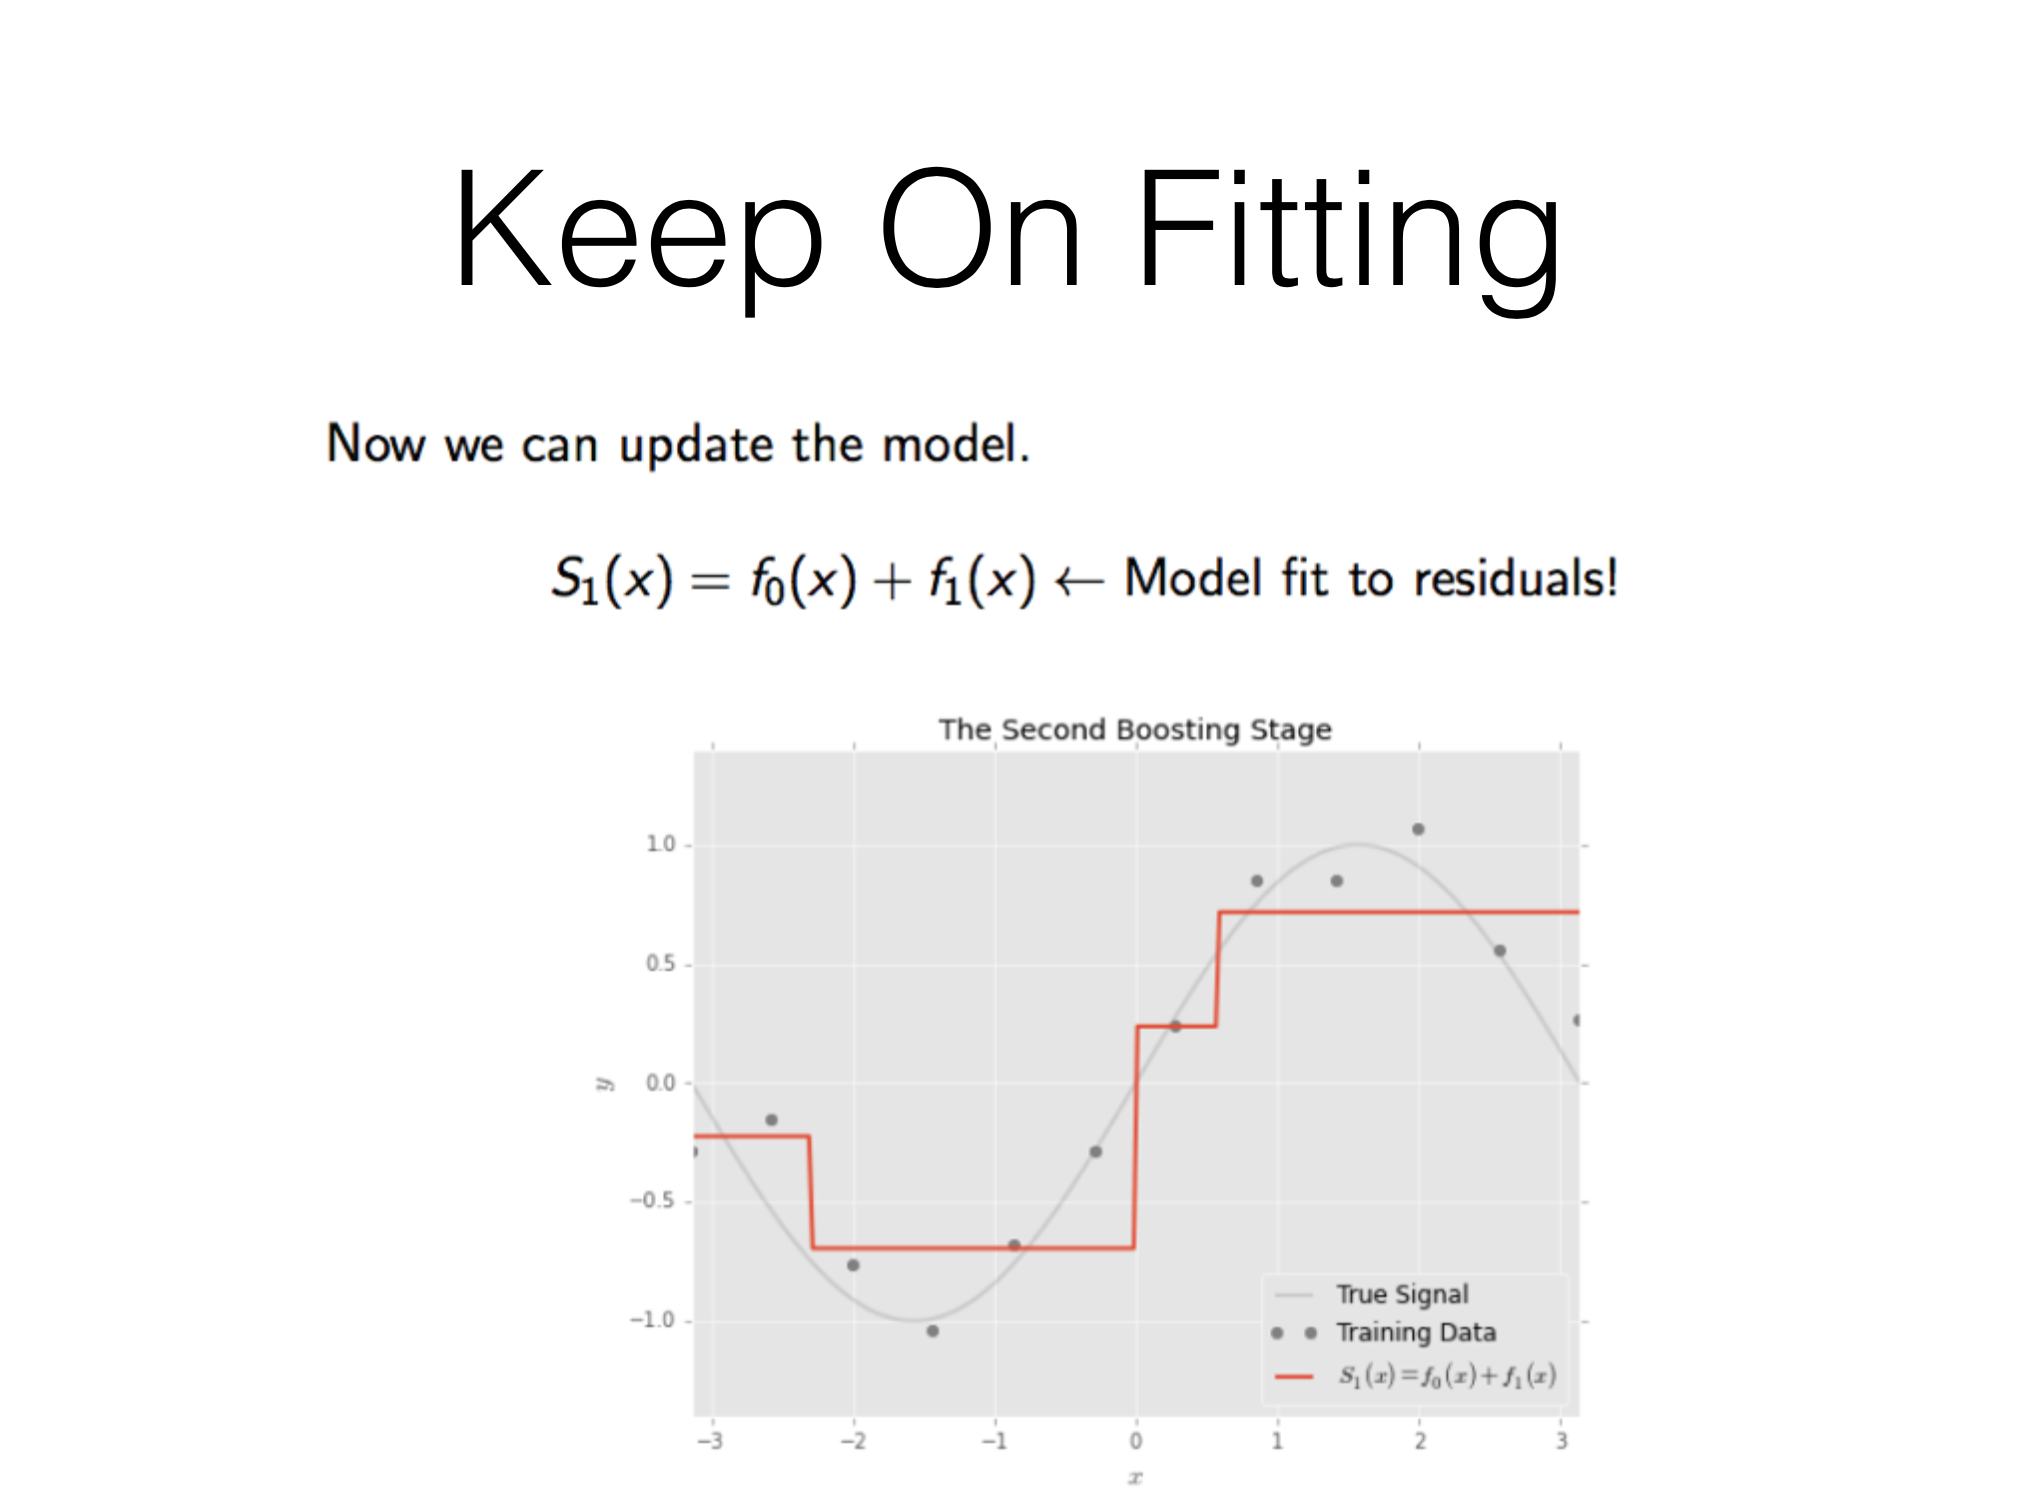

<a id='gradient'></a>
## Gradient boosting regression visualisation

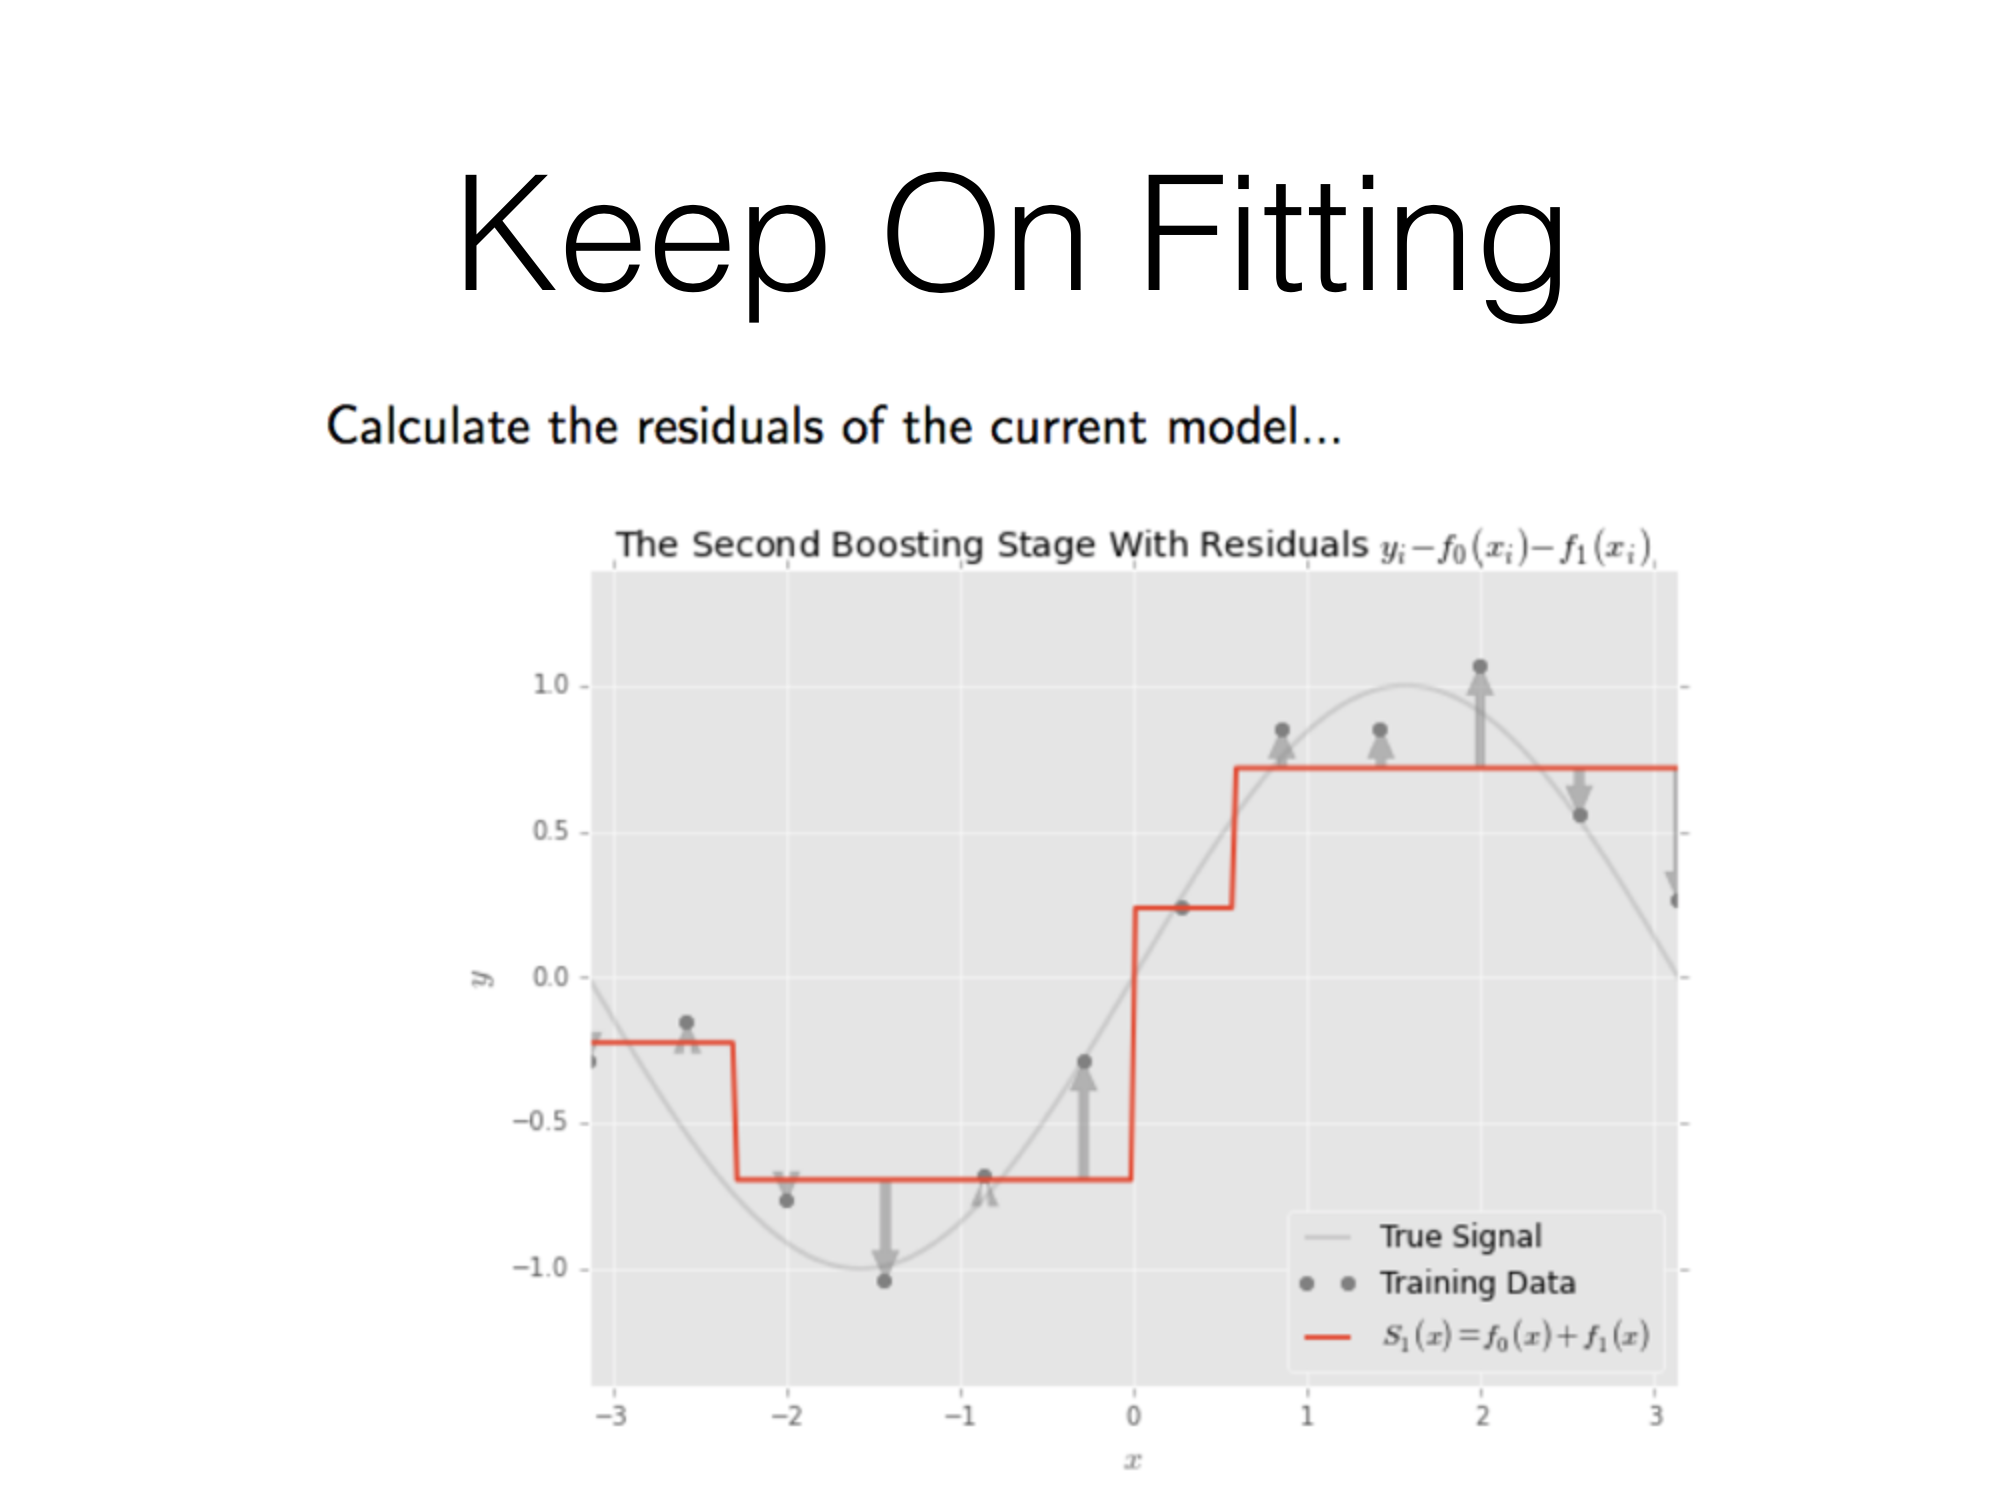


<a id='gradient'></a>
## Gradient boosting regression visualisation

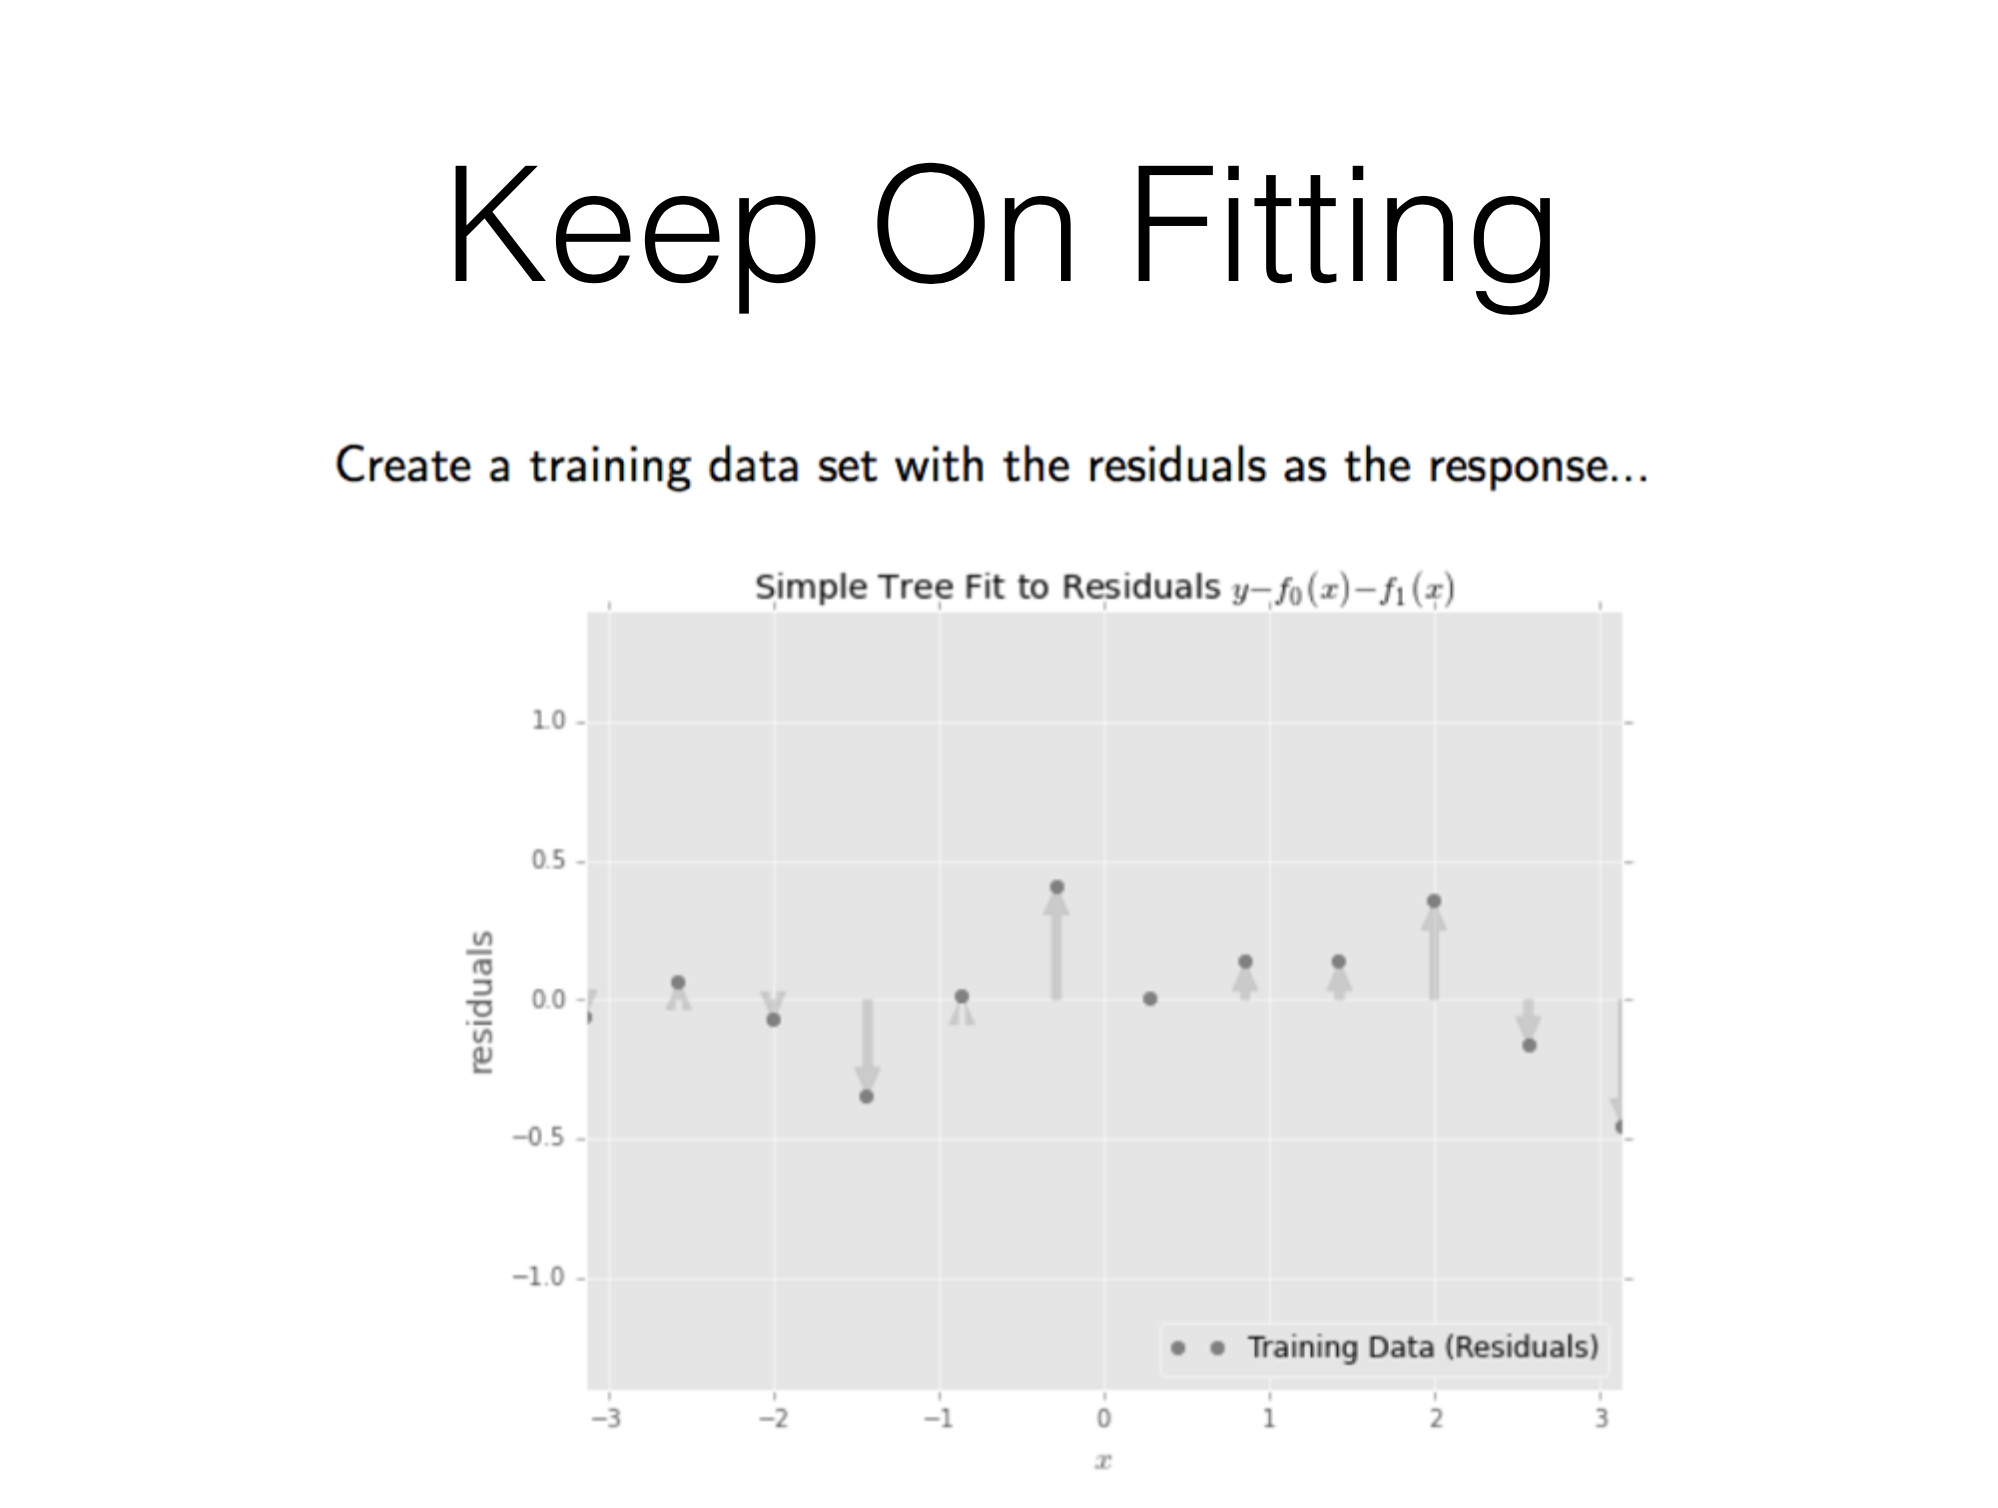

<a id='gradient'></a>
## Gradient boosting regression visualisation

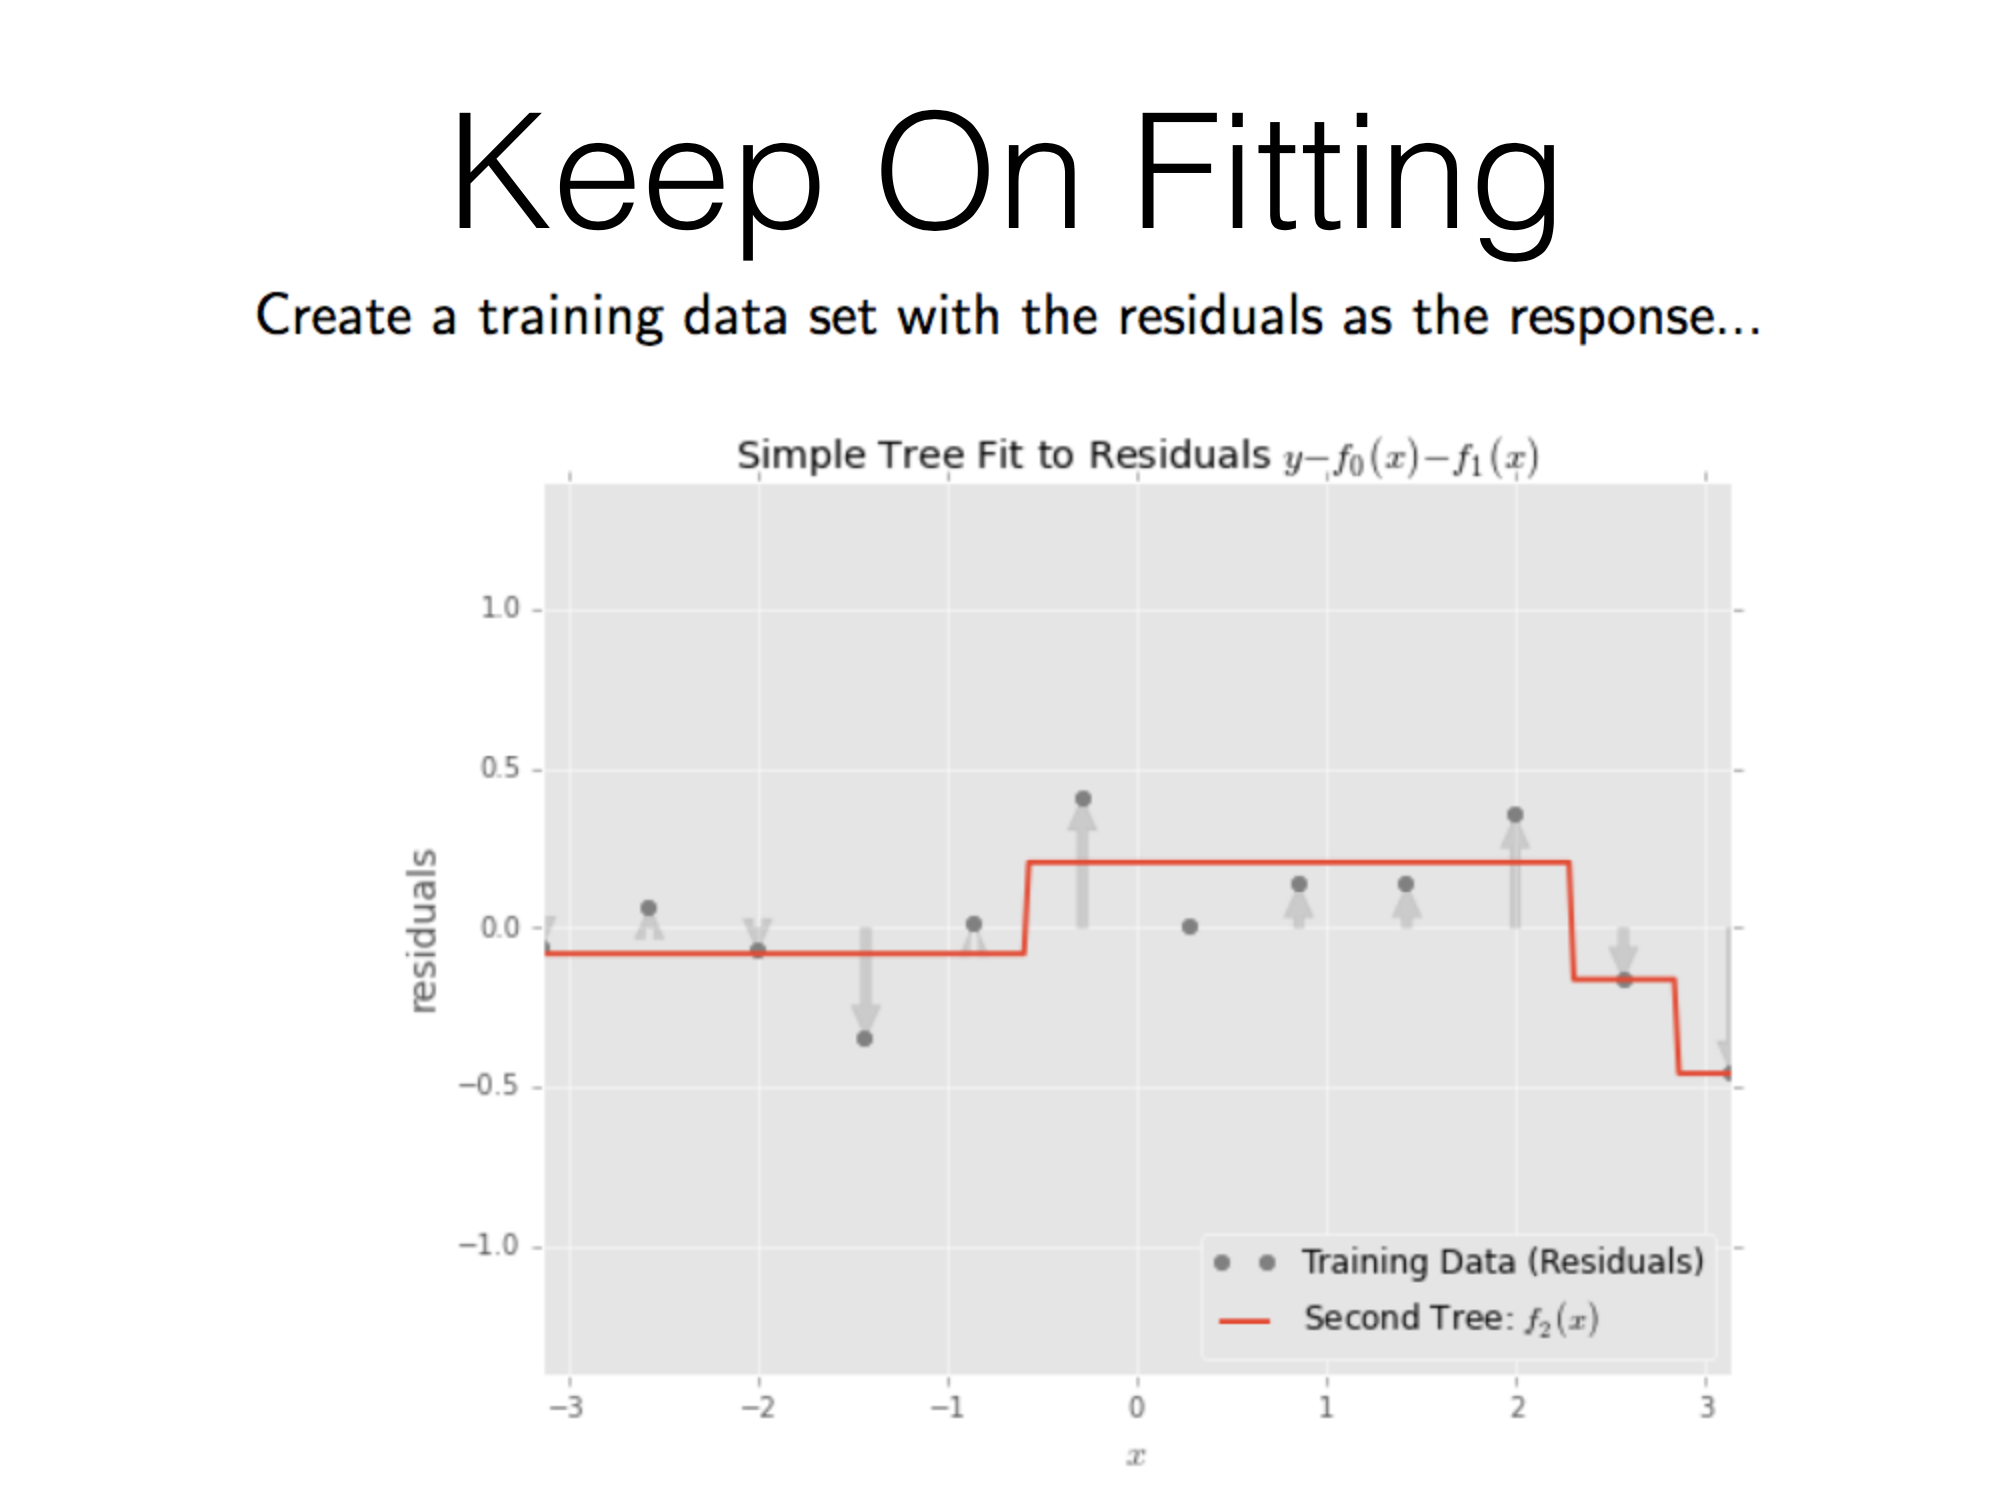

<a id='gradient'></a>
## Gradient boosting regression visualisation

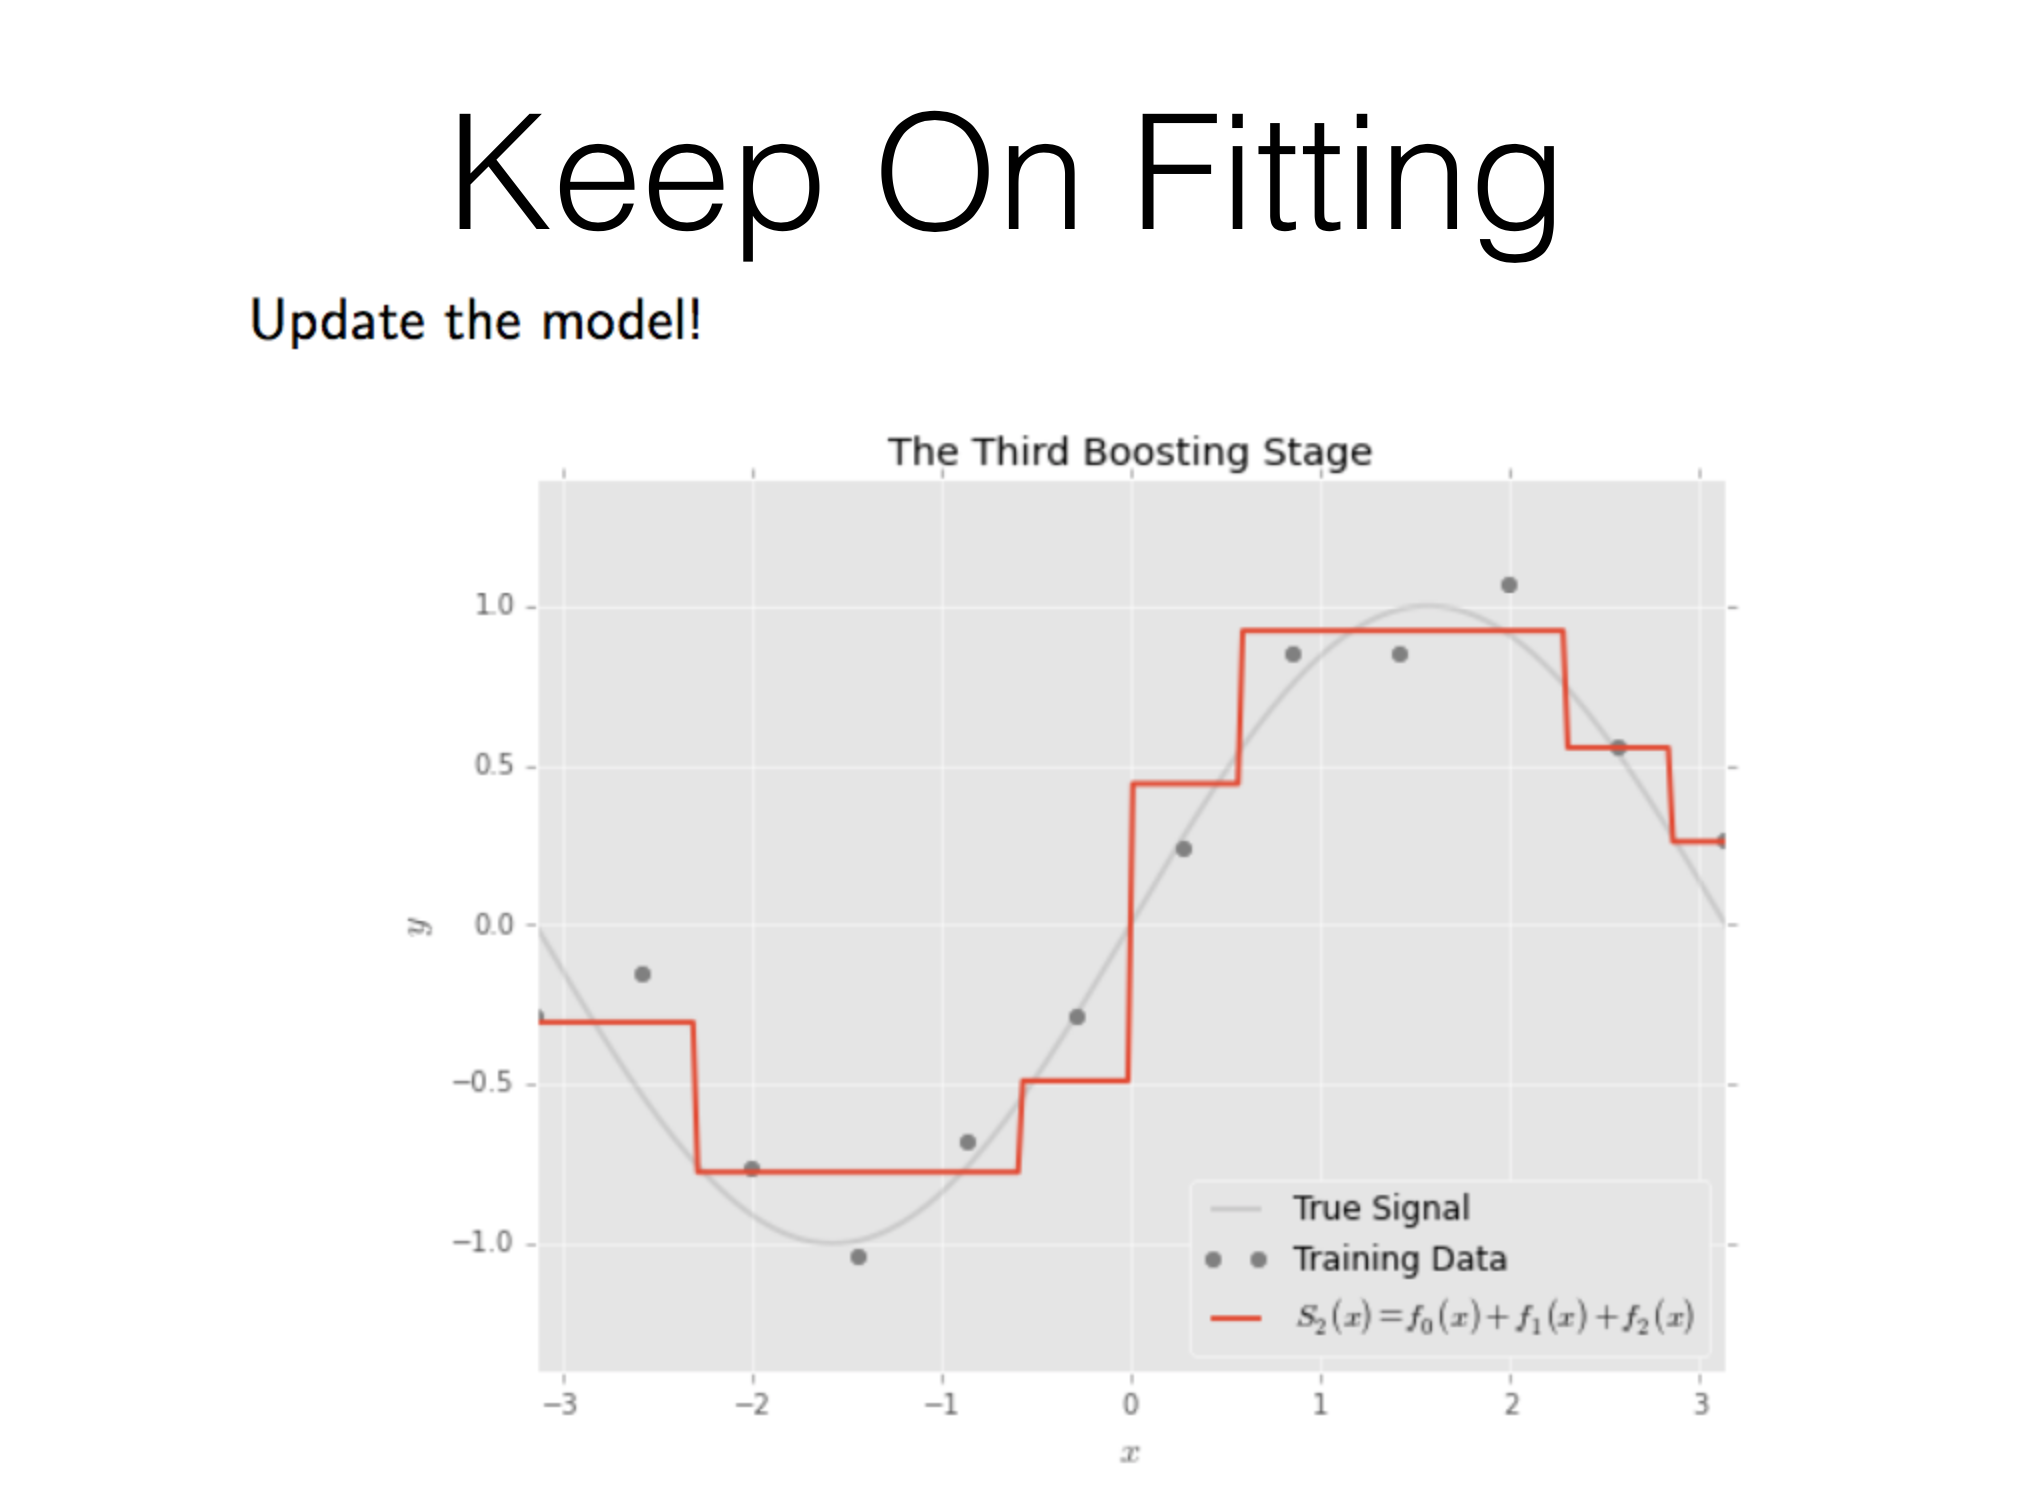

**The advantages of GBRT are:**

- Natural handling of data of mixed type (= heterogeneous features).
- Predictive power.
- Robustness to outliers in output space (via robust loss functions).

**The disadvantages of GBRT are:**
- Scalability, due to the sequential nature of boosting it can hardly be parallelized.
- Difficult hyperparameters to tune.


> _For more detailed explanations see [here](https://www.quora.com/What-is-an-intuitive-explanation-of-Gradient-Boosting) and [here](http://www.ncbi.nlm.nih.gov/pmc/articles/PMC3885826/)_

<a id='the-difference-between-the-adaboost-and-gradient-boosting'></a>
## The difference between the AdaBoost and Gradient Boosting?

---


- AdaBoost is about **re-weighting the preceding model's errors in subsequent iterations**.
- Gradient Boosting is about fitting subsequent models to the **residuals of the last model**.

<a id='resources'></a>

## Additional resources

---

- [Random Forest on wikipedia](https://en.wikipedia.org/wiki/Random_forest)
- [Quora question on Random Forest](https://www.quora.com/How-does-randomization-in-a-random-forest-work?redirected_qid=212859)
- [Scikit Learn Ensemble Methods](http://scikit-learn.org/stable/modules/ensemble.html)
- [Scikit Learn Random Forest Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- [Academic intro to Adaptive Boosting](http://rob.schapire.net/papers/explaining-adaboost.pdf)
- [Stack Exchange AdaBoost vs Gradient Boosting](http://stats.stackexchange.com/questions/164233/intuitive-explanations-of-differences-between-gradient-boosting-trees-gbm-ad)
- [Gentle intro to Gradient Boosting](http://www.ccs.neu.edu/home/vip/teach/MLcourse/4_boosting/slides/gradient_boosting.pdf)
- [Quora on intuitive explanations of Adaboost](https://www.quora.com/What-is-AdaBoost)
- MIT on [adaptive boosting](http://math.mit.edu/~rothvoss/18.304.3PM/Presentations/1-Eric-Boosting304FinalRpdf.pdf)
- A lighter [math introduction](http://www.ccs.neu.edu/home/vip/teach/MLcourse/4_boosting/slides/gradient_boosting.pdf) to AdaBoosting and Gradient Boosting h/t Charlie
- A [walkthrough](https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/) on tuning GBM h/t Sheena
